In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('sales_data.csv', delimiter=',', encoding='latin-1')
print(df.dtypes) 

Date               object
Product Name       object
Product Type       object
Brand              object
Gender             object
Category           object
Country            object
Quantity            int64
Unit Price ($)    float64
Amount ($)        float64
Payment Mode       object
dtype: object


In [4]:
df.isna().sum()

Date              0
Product Name      0
Product Type      0
Brand             0
Gender            0
Category          0
Country           0
Quantity          0
Unit Price ($)    0
Amount ($)        0
Payment Mode      0
dtype: int64

In [5]:
display(df.describe)

<bound method NDFrame.describe of            Date                Product Name Product Type       Brand  Gender  \
0    2022-05-27  Fear of God Essentials Tee      T-shirt  Essentials  Unisex   
1    2022-08-22             Yeezy Boost 350     Sneakers      Adidas  Unisex   
2    2022-04-03               Nike Dunk Low     Sneakers        Nike   Women   
3    2022-07-13            Nike Tech Fleece       Hoodie        Nike     Men   
4    2022-08-25               Jordan 1 High     Sneakers        Nike   Women   
..          ...                         ...          ...         ...     ...   
348  2022-04-08               Jordan 1 High     Sneakers        Nike     Men   
349  2022-08-03            Nike Tech Fleece       Hoodie        Nike   Women   
350  2022-05-05                Puma Joggers      Joggers        Puma   Women   
351  2022-05-19           Adidas Ultraboost     Sneakers      Adidas     Men   
352  2022-07-17               Nike Dunk Low     Sneakers        Nike   Women   

     

In [10]:
df = df.rename(columns={'Unit Price ($)':'Price'})
df = df.rename(columns={'Amount ($)':'Amount'})
display(df['Price'])

0      141.82
1      267.34
2      292.00
3      245.44
4      184.51
        ...  
348     94.25
349    259.00
350    299.73
351     71.26
352    270.14
Name: Price, Length: 353, dtype: float64

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          353 non-null    datetime64[ns]
 1   Product Name  353 non-null    object        
 2   Product Type  353 non-null    object        
 3   Brand         353 non-null    object        
 4   Gender        353 non-null    object        
 5   Category      353 non-null    object        
 6   Country       353 non-null    object        
 7   Quantity      353 non-null    int64         
 8   Price         353 non-null    float64       
 9   Amount        353 non-null    float64       
 10  Payment Mode  353 non-null    object        
 11  MesAno        353 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 33.2+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          353 non-null    datetime64[ns]
 1   Product Name  353 non-null    object        
 2   Product Type  353 non-null    object        
 3   Brand         353 non-null    object        
 4   Gender        353 non-null    object        
 5   Category      353 non-null    object        
 6   Country       353 non-null    object        
 7   Quantity      353 non-null    int64         
 8   Price         353 non-null    float64       
 9   Amount ($)    353 non-null    float64       
 10  Payment Mode  353 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 30.5+ KB


In [30]:
df["Ano"] = df["Date"].dt.year
df["Mes"] = df["Date"].dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353 entries, 224 to 275
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          353 non-null    datetime64[ns]
 1   Product Name  353 non-null    object        
 2   Product Type  353 non-null    object        
 3   Brand         353 non-null    object        
 4   Gender        353 non-null    object        
 5   Category      353 non-null    object        
 6   Country       353 non-null    object        
 7   Quantity      353 non-null    int64         
 8   Price         353 non-null    float64       
 9   Amount        353 non-null    float64       
 10  Payment Mode  353 non-null    object        
 11  MesAno        353 non-null    object        
 12  Ano           353 non-null    int32         
 13  Mes           353 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(8)
memory usage: 38.6+ KB


In [8]:
df["MesAno"] = df["Date"].dt.year.astype(str) + "-" + df["Date"].dt.month.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          353 non-null    datetime64[ns]
 1   Product Name  353 non-null    object        
 2   Product Type  353 non-null    object        
 3   Brand         353 non-null    object        
 4   Gender        353 non-null    object        
 5   Category      353 non-null    object        
 6   Country       353 non-null    object        
 7   Quantity      353 non-null    int64         
 8   Price         353 non-null    float64       
 9   Amount ($)    353 non-null    float64       
 10  Payment Mode  353 non-null    object        
 11  MesAno        353 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 33.2+ KB


In [29]:
display(df.head())


,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Price,Amount,Payment Mode,MesAno
224,2022-01-25,Fear of God Essentials Tee,T-shirt,Essentials,Women,Limited Edition,Germany,1,240.42,240.42,Card,2022-1
113,2022-01-24,Adidas Ultraboost,Sneakers,Adidas,Men,Limited Edition,USA,3,101.39,304.17,Cash on Delivery,2022-1
302,2022-01-06,Adidas Ultraboost,Sneakers,Adidas,Unisex,Sportswear,Germany,1,137.20,137.20,Card,2022-1
269,2022-01-15,Off-White Hoodie,Hoodie,Off-White,Women,Sportswear,USA,5,220.59,1102.95,Wallet,2022-1
106,2022-01-29,Jordan 1 High,Sneakers,Nike,Unisex,Limited Edition,India,3,104.04,312.12,Cash on Delivery,2022-1


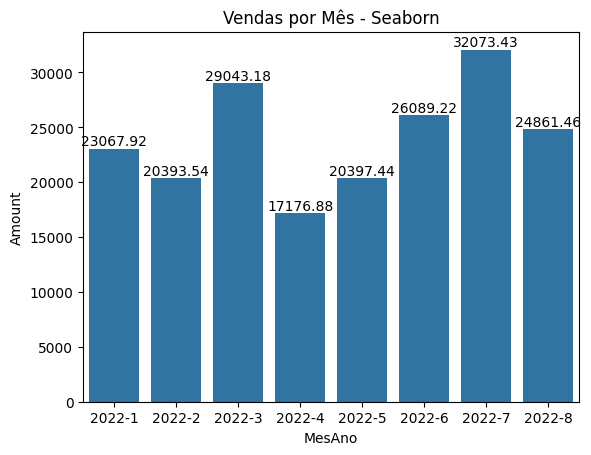

In [24]:
df = df.sort_values('MesAno')
ax = sns.barplot(x="MesAno", y="Amount", data=df, estimator=np.sum, capsize=0.1, err_kws={'color': 'red'}, errorbar=None)
plt.title("Vendas por Mês - Seaborn")

for p in ax.patches:
    valor = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,   # posição x central
        valor,                           # posição y (em cima da barra)
        f'{valor:.2f}',                  # texto formatado
        ha='center',
        va='bottom'
    )

plt.show()

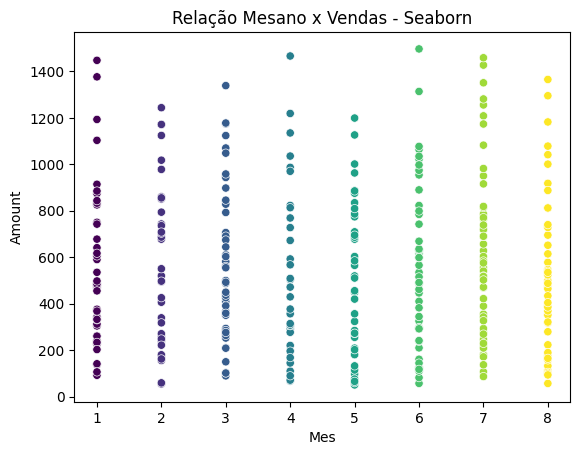

In [32]:
sns.scatterplot(x="Mes", y="Amount", data=df, c=df['Mes'])
plt.title("Relação Mesano x Vendas - Seaborn")
plt.show()


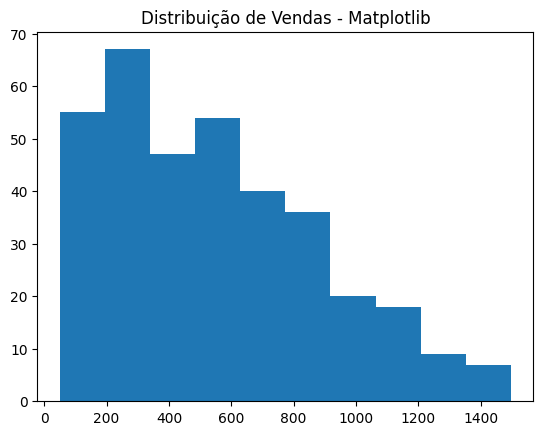

In [33]:
plt.hist(df["Amount"])
plt.title("Distribuição de Vendas - Matplotlib")
plt.show()
